<p style="text-align: center; font-weight: bold; font-size:xx-large; color:green; background-color:#D3EAB9;">Coffee</p>

<img src="Images/coffee_image1.PNG" />

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">Do you ever wonder the significance of all those regions and types printed on bags of coffee?</p>

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">Do any of them truly indicate superior coffee?</p>  

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_theme(style='darkgrid')
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
df = pd.read_csv("coffee_region_variety_totals")

In [3]:
df['Outstanding'] = df['Total_Cup_Points'].astype('int64') # a new column created that will indicate if "Outstanding" or not
df.loc[df["Outstanding"]<85, ["Outstanding"]]=0 # A "0" indicates not "Outstanding"
df.loc[df["Outstanding"]>=85, ["Outstanding"]]=1 # A "1" indicates "Outstanding"
df['Outstanding'] = df['Outstanding'].astype(int)

In [4]:
aspects = ["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness"]

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">The Coffee Quality Institue (https://www.coffeeinstitute.org/) measures these attributes to calculate a total quality score.</p>

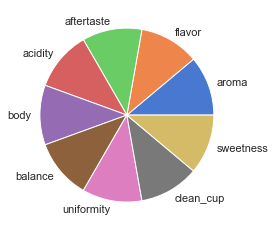

In [5]:
g = [1, 1, 1, 1, 1, 1, 1, 1, 1]
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
ax.pie(g, labels = aspects, colors=colors);

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">Here are the countries represented in the database:</p>

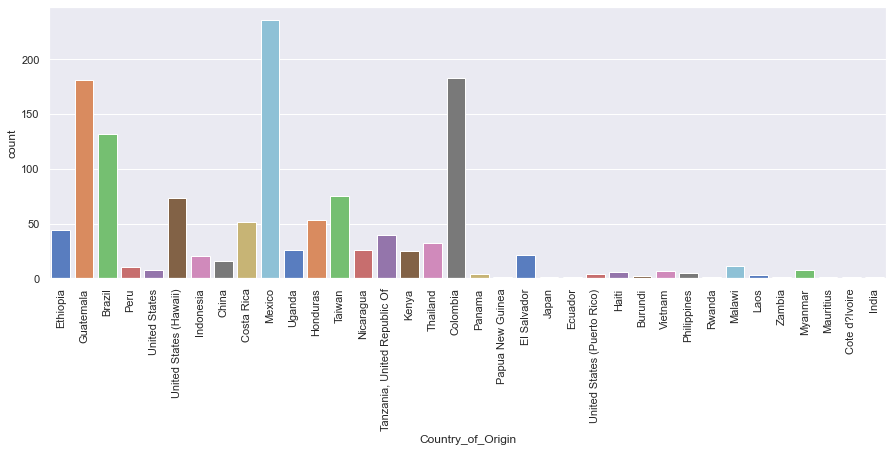

In [6]:
plt.figure(figsize=[15, 5])
plt.subplot(111)
sns.countplot(x='Country_of_Origin', data=df, palette='muted')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">The 40 most represented regions within those countries:</p>

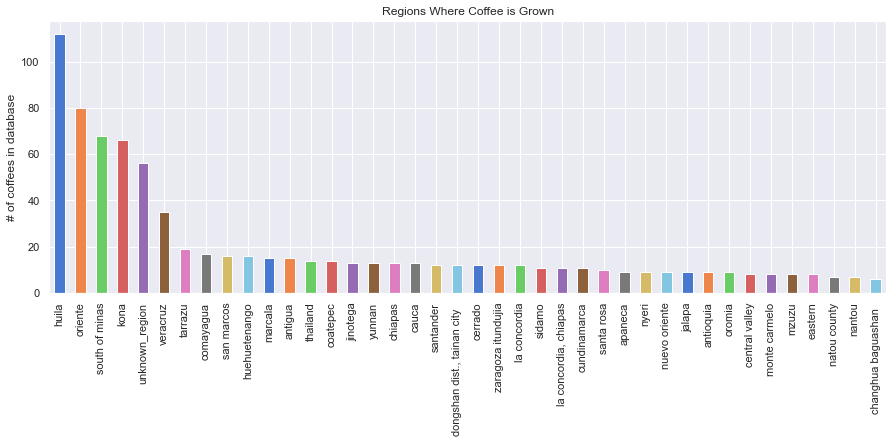

In [7]:
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Region.value_counts().head(40).plot(kind="bar", color = colors, title = 'Regions Where Coffee is Grown', 
                                       ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">And these are the top varieties grown:</p>

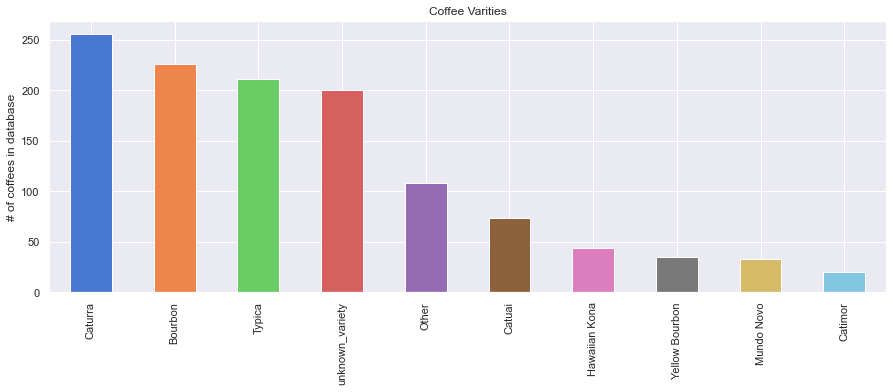

In [8]:
colors = sns.color_palette('muted')
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
df.Variety.value_counts().head(10).plot(kind="bar", color = colors, title = 'Coffee Varities', 
                                        ylabel = '# of coffees in database');

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">A coffee is considered "outstanding" if it scores a total of 85 or higher. This is roughly 10% of coffes tested, like getting an "A" grade in quality.</p>

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">A very few regions produced more than one "Outstanding" coffee in this dataset.</p>


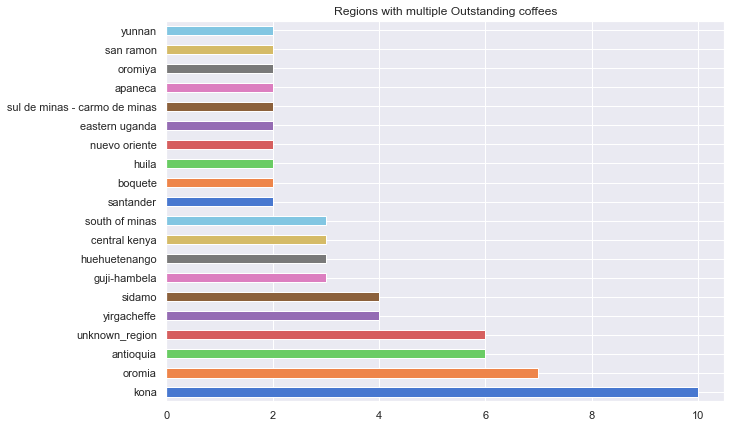

In [9]:
colors = sns.color_palette('muted')
df_outstanding = df[df['Outstanding'] == 1]
df_outstanding_top = df_outstanding.Region.value_counts().head(20)
df_outstanding_top.plot(kind = 'barh', color = colors, sort_columns = True, figsize = (10, 7), 
                        title = 'Regions with multiple Outstanding coffees');

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">The "outstanding" variety appears to differ according to the country. Perhaps these are the varities best suited to their climate.</p>

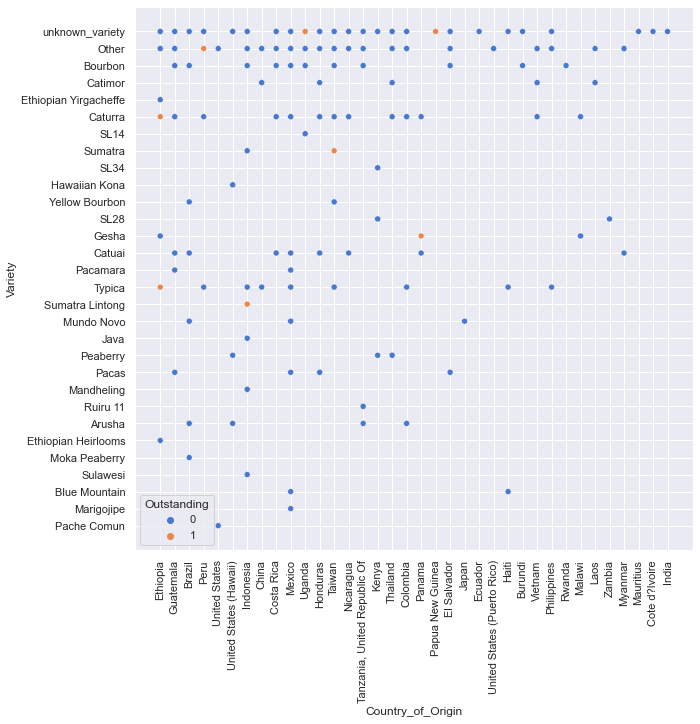

In [10]:
plt.figure(figsize=[10, 10])
plt.subplot(111)
sns.scatterplot(data=df, x='Country_of_Origin', y='Variety', hue='Outstanding', palette='muted')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">There are too many coffee regions to plot in a visually informative way, but feel free to scroll and compare any 2.</p>

In [11]:
@interact
def mean_points(column=list(set(df['Region'])), column2=list(set(df['Region']))):
    show = df[df.Region == column]
    show2 = df[df.Region == column2]
    fig, plt.subplots(figsize = (10,4))
    sns.scatterplot(data=show, x='Region', y='Total_Cup_Points', palette='muted')
    sns.scatterplot(data=show2, x='Region', y='Total_Cup_Points', palette='muted')
    

interactive(children=(Dropdown(description='column', options=('acatenango', 'western region', 'Taichung News A…

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">While most varities vary from poor to excellent quality, one outlier is consistently great with a large dataset - the Ethiopian Yirgacheffe .</p>

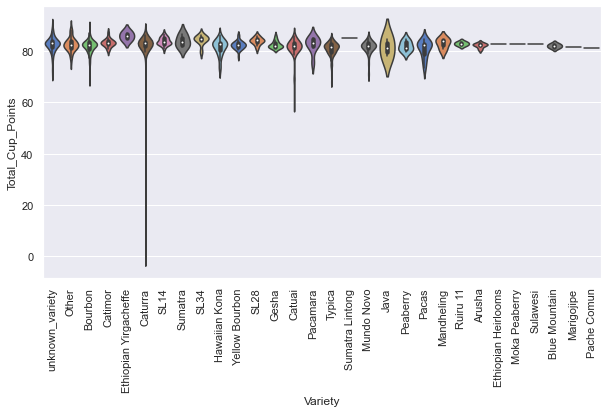

In [12]:
plt.figure(figsize=[10, 5])
plt.subplot(111)
sns.violinplot(data=df, x='Variety', y='Total_Cup_Points', palette='muted', scale = 'width')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">In regards to country of origin, Ethopia also seems to be top of the pack overall.</p>

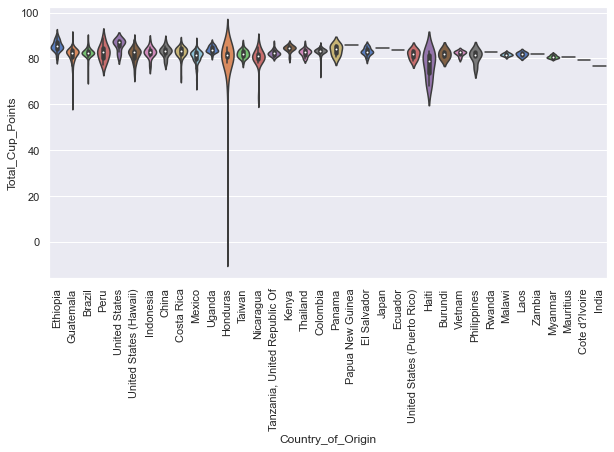

In [13]:
plt.figure(figsize=[10, 5])
plt.subplot(111)
sns.violinplot(data=df, x='Country_of_Origin', y='Total_Cup_Points', palette='muted', scale = 'width')
plt.xticks(rotation=90);

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">The following blocks create a machine learning model that contains only variety and country information. The goal is to train the model to predict if a coffee will be "Outstanding" based on those two factors. Unnecessary columns are dropped, and "dummy columns" are created in order to encode categorical data as numerical.</p>

In [14]:
df_shuffled = df.sample(frac=1) #create a shuffled data set to choose test and training data from

In [15]:
df_shuffled_simple = df_shuffled.drop(['Total_Cup_Points', 'Region'], axis=1) #drop unnecessary columns

In [16]:
df_country = pd.get_dummies(df_shuffled_simple['Country_of_Origin']) #create dummy columns to encode country categories

In [17]:
df_variety = pd.get_dummies(df_shuffled_simple['Variety']) #create dummy columns to encode variety categories

In [18]:
#add country dummy columns to original and drop country column
df_join1 = df_shuffled_simple.join(df_country) 
df_join1.drop('Country_of_Origin', axis=1, inplace=True)

In [19]:
#add variety dummy columns to previous and drop variety column
df_join2 = df_join1.join(df_variety)
df_join2.drop('Variety', axis=1, inplace=True)

In [20]:
X = df_join2.drop(['Outstanding'], axis=1).values

In [21]:
y = df_join2['Outstanding'].values

In [60]:
#create test and train splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=15)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
#This trained the data
classifier = LogisticRegression(random_state=15)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=15)

In [63]:
y_predict = classifier.predict(X_test)

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">What follows is the resut of testing the linear regression model. The heatmap below shows (in order, left to right, top to bottom): 1. standard coffee predicted correctly 2. outstanding coffee predicted standard  3. standard coffee predicted outstanding 4. outstanding coffee predicted correctly.</p>

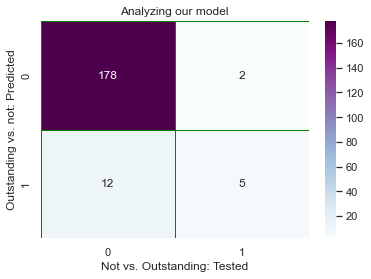

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt='d', cmap="BuPu", linewidths=0.5, linecolor='green', xticklabels=True, yticklabels=True);
plt.xlabel("Not vs. Outstanding: Tested");
plt.ylabel("Outstanding vs. not: Predicted");
plt.title("Analyzing our model");

<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">Statistics on those numbers follow. Be aware, the model is not deterministic, and may give slightly different outcomes each run. On multiple runs, the precision for detecting standard coffees remains above 90%, and the precision for detecting outstanding coffees varies but is frequently above 50%. Overall, the model is extremely accurate at weeding out the not outstanding coffees, but only moderately accurate at predicting the outstanding ones.</p>

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict));

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       180
           1       0.57      0.24      0.33        17

    accuracy                           0.92       197
   macro avg       0.75      0.61      0.65       197
weighted avg       0.90      0.92      0.90       197



<p style="text-align: center; font-weight: bold; font-size:large; color:green; background-color:#D3EAB9;">This is actually a good direction for the program to err in. The company risks the most financial loss if they invest in a region that produces inferior coffee, but there is very little downside to not investing in a region. The company can depend on this model to toss out the majority of the coffees not worth considering, and then apply their limited human resources to more deeply investigating the coffees the model did predict would be "outstanding".</p>